<a href="https://colab.research.google.com/github/OSGeoLabBp/tutorials/blob/master/hungarian/machine_learning/lessons/concrete_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresszió neurális hálózattal

Beton szilárdság meghatározása összetevők és kor alapján.

Összetevők: cement, kohósalak, pernye,
víz, szuperlágyító, durva és finom adalékanyag

In [29]:
!wget -q https://raw.githubusercontent.com/OSGeoLabBp/tutorials/master/english/machine_learning/lessons/data/concrete_data.csv

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, LayerNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [5]:
data = pd.read_csv('concrete_data.csv')
data.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
data.isna().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [32]:
X = data[data.columns[data.columns != 'concrete_compressive_strength']]
y = data['concrete_compressive_strength']
sc = StandardScaler()
sc.fit(X)   # normalizálás paraméterei
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [86]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(X.shape[1],)))
#model.add(LayerNormalization())
model.add(Dense(10, activation='relu'))
model.add(LayerNormalization())
model.add(Dense(10, activation='relu'))
#model.add(LayerNormalization())
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
hist = model.fit(X_train_sc, y_train, epochs=100, verbose=0)

In [60]:
"""model = Sequential()
model.add(Dropout(0.1))
model.add(Dense(100, activation='relu', input_shape=(X.shape[1],)))
model.add(Dropout(0.7))
model.add(Dense(5, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
hist = model.fit(X_train_sc, y_train, epochs=100, verbose=0)
"""

"model = Sequential()\nmodel.add(Dropout(0.1))\nmodel.add(Dense(100, activation='relu', input_shape=(X.shape[1],)))\nmodel.add(Dropout(0.7))\nmodel.add(Dense(5, activation='tanh'))\nmodel.add(Dropout(0.2))\nmodel.add(Dense(1))\nmodel.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])\nhist = model.fit(X_train_sc, y_train, epochs=100, verbose=0)\n"

In [89]:
y_pred = model.predict(X_test_sc)
y_train_pred = model.predict(X_train_sc)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean MSE (test): {mean_squared_error(y_test, y_pred):.4f} (train): {mean_squared_error(y_train, y_train_pred):.4f}")
print(f"R2 score (test): {r2_score(y_test, y_pred):.1%} (train): {r2_score(y_train, y_train_pred):.1%}")

23/23 [==============================] - 0s 2ms/step
Mean MSE (test): 45.7742 (train): 30.3428
R2 score (test): 83.1% (train): 89.2%


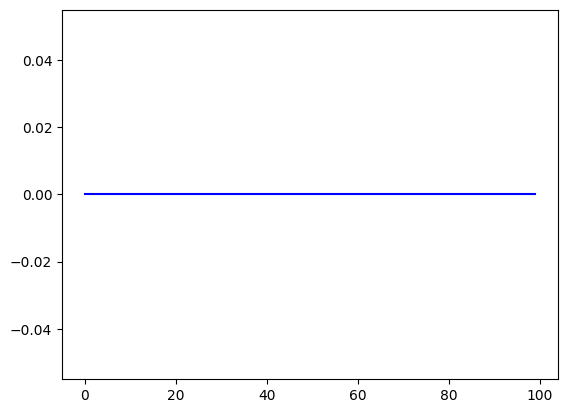

In [46]:
plt.plot(hist.history['accuracy'], color='blue', label='tréning')
#plt.plot(hist.history['val_accuracy'], color='orange', label='teszt')